In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# CSV 파일 경로
csv_file_path = '/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/(KISIA) 2023 AI보안 기술개발 - 악성코드반 데이터셋/(KISIA) 2023 AI보안 기술개발 - 악성코드반 데이터셋.CSV'

# CSV 파일을 pandas DataFrame으로 읽기
data = pd.read_csv(csv_file_path)

# Feature 열 선택
X = data.loc[:, 'API/DLL_0':'ENTRY_49']

# Label 열 선택
y = data['Label']

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyboardInterrupt: ignored

# **랜덤 포레스트**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 분류 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델을 학습 데이터로 훈련
rf_model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100}%')

모델 정확도: 96.05194123819517%


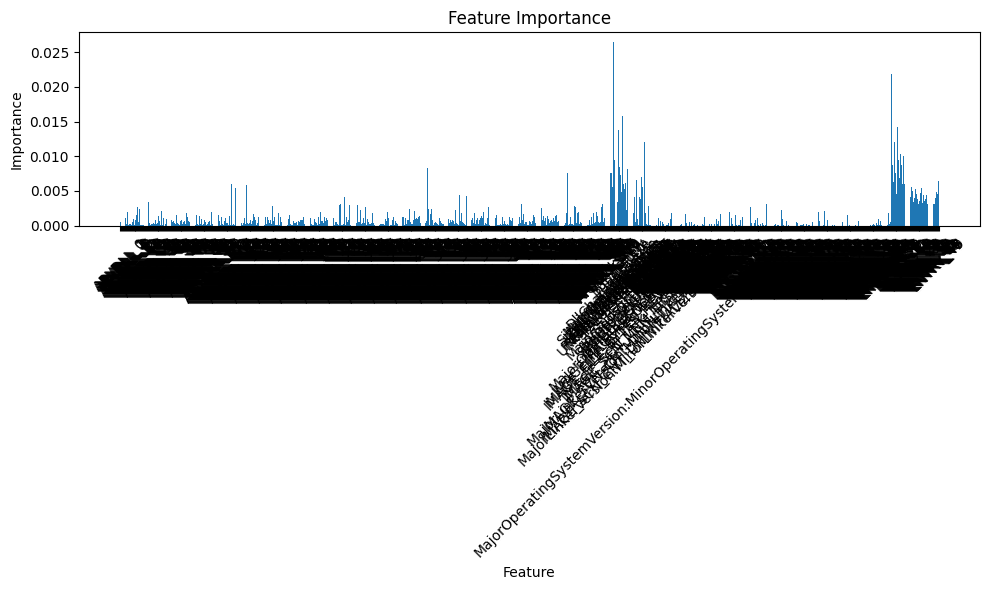

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance 추출
feature_importance = rf_model.feature_importances_

# Feature Importance를 바 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance를 기준으로 내림차순 정렬
sorted_indices = (-feature_importance).argsort()

# 상위 50개 Feature의 이름 출력
top_50_feature_names = X.columns[sorted_indices][:50]
print("상위 50개 Feature의 이름:")
print(top_50_feature_names)

상위 50개 Feature의 이름:
Index(['CheckSum', 'ENTRY_0', 'ImageBase', 'ENTRY_6', 'Text_VirtualSize_por',
       'IMAGE_SCN_MEM_DISCARDABLE', 'ENTRY_3', 'ENTRY_9', 'ENTRY_12',
       'ENTRY_7', 'NumberOfSections', 'ENTRY_1', 'ENTRY_10', 'ENTRY_16',
       'Reloc_VirtualSize_por', 'API/DLL_321', 'MajorSubsystemVersion',
       'ENTRY_19', 'DllCharacteristics', 'ENTRY_4', 'SizeOfInitializedData',
       'API/DLL_467', 'Subsystem', 'SizeOfStackReserve', 'IMAGE_SCN_CNT_CODE',
       'ENTRY_8', 'ENTRY_18', 'RawSize', 'ENTRY_49', 'ENTRY_2',
       'MajorLinkerVersion', 'ENTRY_43', 'IMAGE_FILE_RELOCS_STRIPPED',
       'ENTRY_11', 'ENTRY_17', 'API/DLL_116', 'ENTRY_13', 'e_lfanew',
       'ENTRY_14', 'API/DLL_132', 'ENTRY_42',
       'IMAGE_SCN_CNT_UNINITIALIZED_DATA.1', 'MajorImageVersion', 'ENTRY_21',
       'ENTRY_31', 'API/DLL_120', 'Characteristics', 'ENTRY_25', 'ENTRY_15',
       'ENTRY_22'],
      dtype='object')


# **의사 결정 트리**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 의사 결정 트리 분류 모델 생성
dt_model = DecisionTreeClassifier()

# 모델을 학습 데이터로 훈련
dt_model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = dt_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100}%')

모델 정확도: 94.84522560335782%


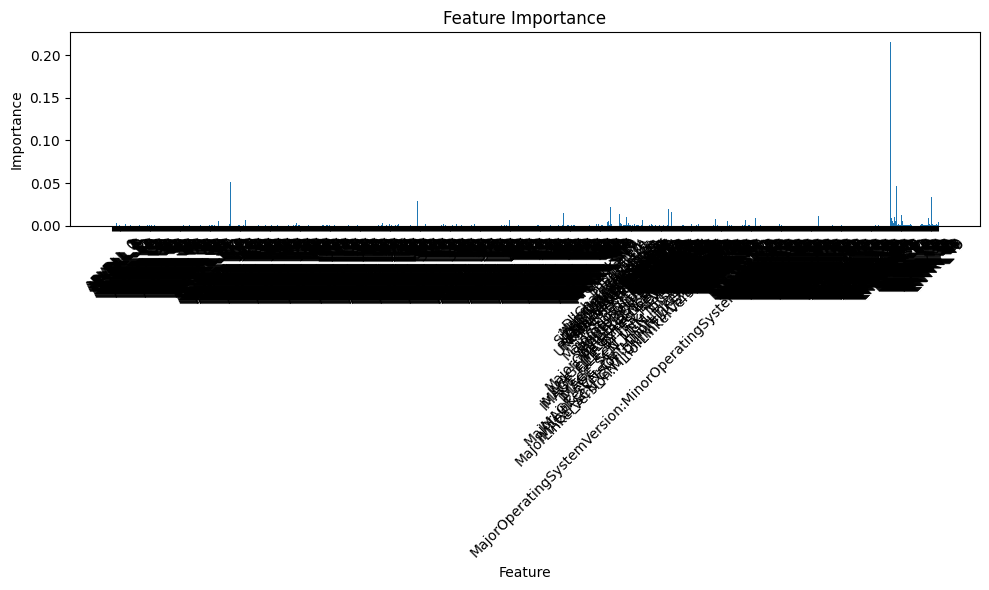

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance 추출
feature_importance = dt_model.feature_importances_

# Feature Importance를 바 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance를 기준으로 내림차순 정렬
sorted_indices = (-feature_importance).argsort()

# 상위 50개 Feature의 이름 출력
top_50_feature_names = X.columns[sorted_indices][:50]
print("상위 50개 Feature의 이름:")
print(top_50_feature_names)

상위 50개 Feature의 이름:
Index(['ENTRY_0', 'API/DLL_123', 'Reloc_VirtualSize_por', 'ENTRY_6',
       'Text_VirtualSize_por', 'ENTRY_42', 'Entropy186', 'API/DLL_316',
       'Subsystem', 'AddressOfEntryPoint', 'CheckSum', 'Entropy26',
       'Entropy29', 'API/DLL_213', 'API/DLL_467', 'e_lfanew', 'ENTRY_11',
       'Entropy181', 'ENTRY_4', 'IMAGE_FILE_BYTES_REVERSED_LO', 'API/DLL_275',
       'ENTRY_1', 'API/DLL_116', 'ENTRY_25', 'ENTRY_39', 'Entropy116',
       'Entropy75', 'IMAGE_SCN_MEM_WRITE', 'API/DLL_138', 'API/DLL_411',
       'Entropy106', 'ENTRY_12', 'ENTRY_5', 'API/DLL_110', 'ENTRY_2',
       'DllCharacteristics', 'Entropy87', 'API/DLL_459', 'ENTRY_24',
       'ENTRY_49', 'SizeOfInitializedData', 'ENTRY_27', 'API/DLL_191',
       'MajorLinkerVersion:MinorLinkerVersionH1', 'Characteristics',
       'Entropy125', 'API/DLL_280', 'ENTRY_3', 'API/DLL_26', 'API/DLL_5'],
      dtype='object')


# **로지스틱 회귀**

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 분류 모델 생성
lr_model = LogisticRegression(C=1, penalty='l1', solver='liblinear')

# 모델을 학습 데이터로 훈련
lr_model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = lr_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100}%')

모델 정확도: 95.23871983210913%


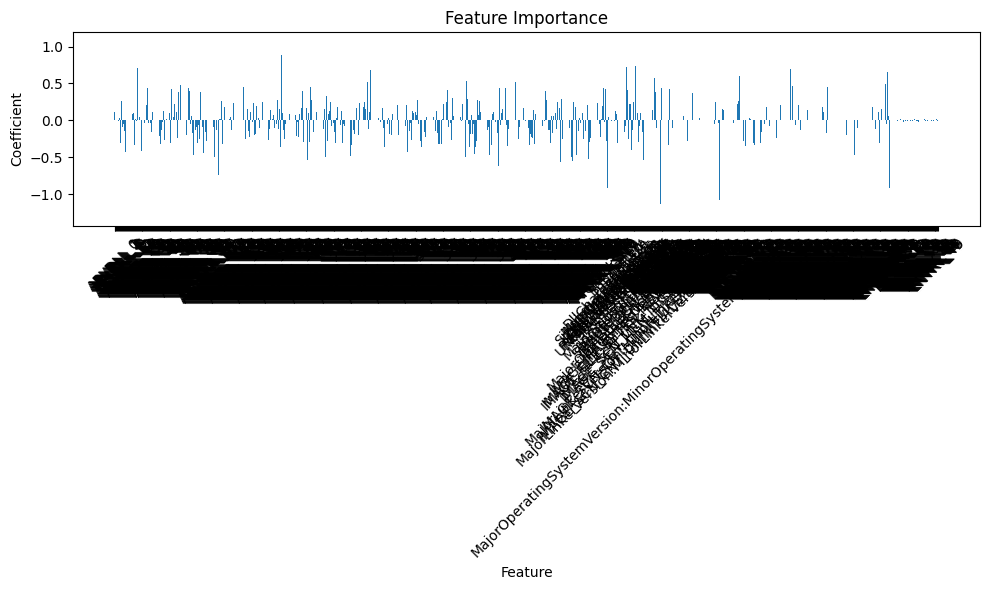

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance 계수(coef_)를 사용하여 추출
feature_importance = lr_model.coef_[0]

# Feature Importance를 바 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(X_train.columns)), feature_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance를 기준으로 내림차순 정렬
sorted_indices = (-feature_importance).argsort()

# 상위 50개 Feature의 이름 출력
top_50_feature_names = X.columns[sorted_indices][:50]
print("상위 50개 Feature의 이름:")
print(top_50_feature_names)

상위 50개 Feature의 이름:
Index(['Entropy143', 'API/DLL_173', 'VirtualSize', 'Entropy1',
       'IMAGE_FILE_BYTES_REVERSED_HI', 'API/DLL_24', 'Entropy35', 'API/DLL_16',
       'Entropy152', 'API/DLL_265', 'API/DLL_497', 'Entropy252', 'Entropy99',
       'Entropy11', 'API/DLL_365', 'API/DLL_262', 'API/DLL_416', 'Entropy250',
       'API/DLL_98', 'API/DLL_68', 'API/DLL_272', 'Entropy154', 'API/DLL_380',
       'API/DLL_203', 'Entropy190', 'API/DLL_134', 'API/DLL_77', 'API/DLL_507',
       'API/DLL_34', 'API/DLL_405', 'Entropy18', 'API/DLL_399', 'Entropy202',
       'API/DLL_509', 'API/DLL_59', 'Entropy26',
       'IMAGE_FILE_BYTES_REVERSED_LO', 'API/DLL_345', 'API/DLL_441',
       'API/DLL_78', 'Entropy33', 'API/DLL_447', 'API/DLL_295', 'API/DLL_383',
       'API/DLL_195', 'Entropy116', 'API/DLL_66', 'Entropy12', 'API/DLL_89',
       'API/DLL_13'],
      dtype='object')


#**그래디언트 부스팅**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 랜덤 포레스트 분류 모델 생성
gb_model = GradientBoostingClassifier()

# 모델을 학습 데이터로 훈련
gb_model.fit(X_train, y_train)

# 모델을 사용하여 예측
y_pred = gb_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy * 100}%')

모델 정확도: 95.2124868835257%


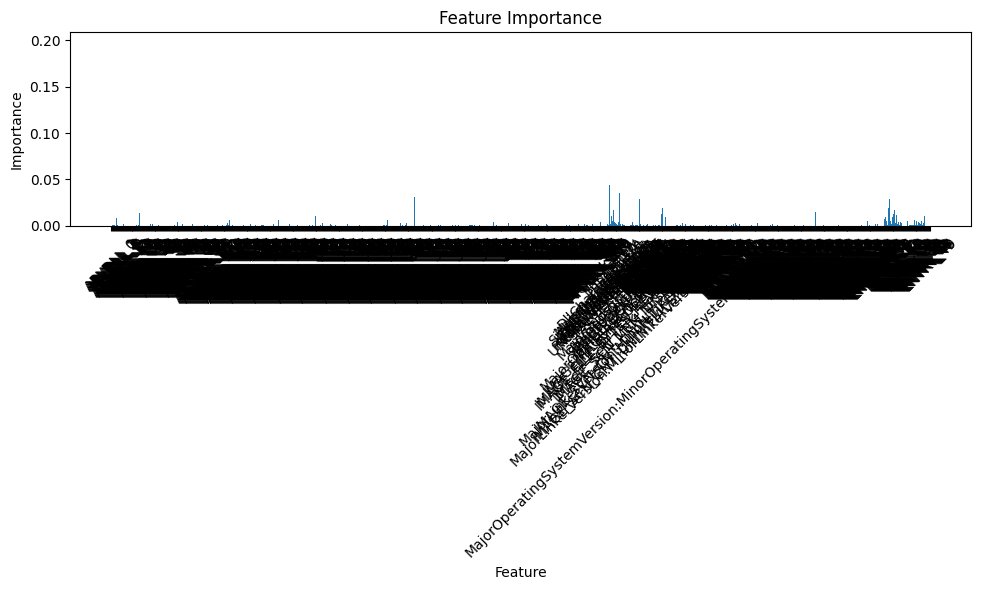

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance 추출
feature_importance = gb_model.feature_importances_

# Feature Importance를 바 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance를 기준으로 내림차순 정렬
sorted_indices = (-feature_importance).argsort()

# 상위 50개 Feature의 이름 출력
top_50_feature_names = X.columns[sorted_indices][:50]
print("상위 50개 Feature의 이름:")
print(top_50_feature_names)

상위 50개 Feature의 이름:
Index(['ENTRY_0', 'CheckSum', 'Text_VirtualSize_por', 'SizeOfStackReserve',
       'API/DLL_316', 'Entropy2', 'ENTRY_7', 'Entropy26', 'ENTRY_6',
       'API/DLL_132', 'ENTRY_12', 'ImageBase', 'Entropy186', 'API/DLL_29',
       'Entropy25', 'ENTRY_11', 'ENTRY_14', 'Entropy181', 'Subsystem',
       'ENTRY_43', 'API/DLL_213', 'Entropy29', 'ENTRY_10', 'ENTRY_3',
       'API/DLL_467', 'API/DLL_5', 'ENTRY_2', 'API/DLL_174', 'API/DLL_123',
       'SizeOfUninitializedData', 'API/DLL_288', 'ENTRY_33', 'ENTRY_4',
       'AddressOfEntryPoint', 'Entropy240', 'ENTRY_1', 'ENTRY_40', 'ENTRY_8',
       'ENTRY_35', 'ENTRY_26', 'ENTRY_37', 'e_lfanew', 'ENTRY_16',
       'API/DLL_399', 'API/DLL_510', 'MajorSubsystemVersion',
       'SizeOfInitializedData', 'Entropy180', 'ENTRY_18', 'ENTRY_25'],
      dtype='object')


# **XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Label을 숫자로 변환
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train)
y_test_xgb = label_encoder.fit_transform(y_test)

# XGBoost 분류 모델 생성
xgb_model = xgb.XGBClassifier(random_state=42)

# 모델을 학습 데이터로 훈련
xgb_model.fit(X_train, y_train_xgb)

# 모델을 사용하여 예측
y_pred = xgb_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test_xgb, y_pred)
print(f'모델 정확도: {accuracy * 100}%')


모델 정확도: 96.81269674711437%


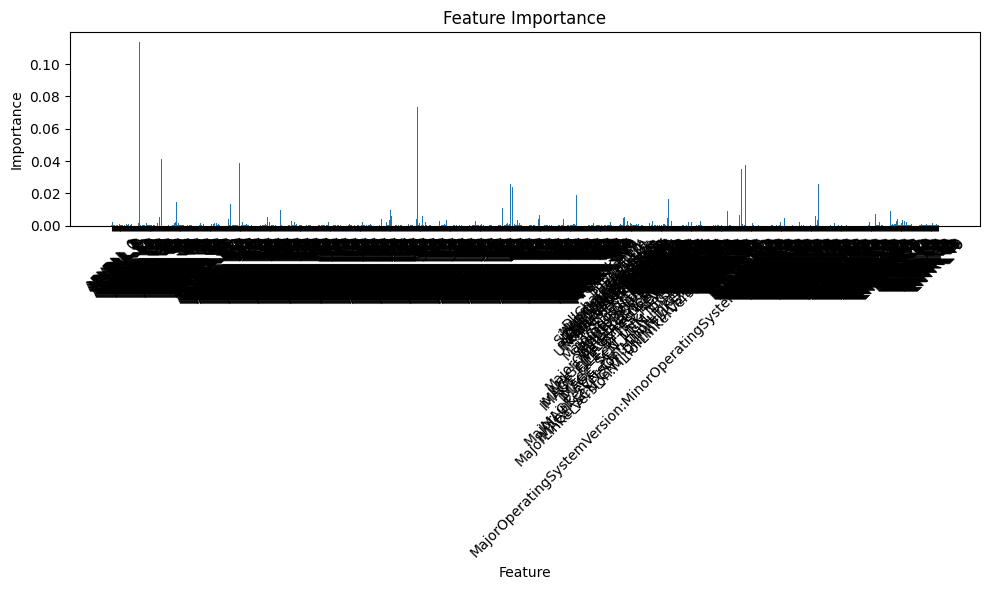

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance 추출
feature_importance = xgb_model.feature_importances_

# Feature Importance를 바 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance를 기준으로 내림차순 정렬
sorted_indices = (-feature_importance).argsort()

# 상위 50개 Feature의 이름 출력
top_50_feature_names = X.columns[sorted_indices][:50]
print("상위 50개 Feature의 이름:")
print(top_50_feature_names)

상위 50개 Feature의 이름:
Index(['API/DLL_29', 'API/DLL_316', 'API/DLL_51', 'API/DLL_132', 'Entropy106',
       'Entropy102', 'Entropy2', 'Entropy186', 'Entropy181', 'API/DLL_412',
       'API/DLL_414', 'API/DLL_480', 'Entropy26', 'API/DLL_179', 'API/DLL_67',
       'API/DLL_123', 'API/DLL_404', 'API/DLL_288', 'API/DLL_174', 'Entropy87',
       'ENTRY_0', 'Entropy240', 'Entropy100', 'API/DLL_442', 'API/DLL_321',
       'Entropy178', 'API/DLL_289', 'SizeOfStackReserve', 'API/DLL_161',
       'API/DLL_49', 'API/DLL_213', 'MajorSubsystemVersion', 'Entropy25',
       'API/DLL_457', 'Entropy146', 'API/DLL_467', 'API/DLL_315', 'Entropy158',
       'API/DLL_441', 'API/DLL_121', 'API/DLL_279', 'ENTRY_7', 'API/DLL_346',
       'API/DLL_419', 'API/DLL_287', 'ENTRY_12', 'Entropy180', 'ImageBase',
       'Text_VirtualSize_por', 'Entropy161'],
      dtype='object')


# **피클 파일로 저장**

In [ ]:
import joblib
# model save
joblib.dump(rf_model,'/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/model_pickle/rf_classifier.pkl')
joblib.dump(xgb_model,'/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/model_pickle/xgb_classifier.pkl')

['/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/model_pickle/xgb_classifier.pkl']

In [ ]:
import joblib
model_from_joblib = joblib.load('/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/model_pickle/rf_classifier.pkl')

In [3]:
import pandas as pd
# CSV 파일 경로
csv_file_path = '/content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/(KISIA) 2023 AI보안 기술개발 - 악성코드반 데이터셋/(KISIA) 2023 AI보안 기술개발 - 악성코드반 데이터셋.CSV'

# CSV 파일 읽기
data_for_test = pd.read_csv(csv_file_path, nrows=1)
print(data_for_test)

                                           File_Name  API/DLL_0  API/DLL_1  \
0  501E1BEEF8794B21DE1B816AAFD4DDF477A844193857B6...          0          0   

   API/DLL_2  API/DLL_3  API/DLL_4  API/DLL_5  API/DLL_6  API/DLL_7  \
0          0          0          0          0          0          0   

   API/DLL_8  ...  ENTRY_41  ENTRY_42  ENTRY_43  ENTRY_44  ENTRY_45  ENTRY_46  \
0          0  ...         0         0         0         0         0         0   

   ENTRY_47  ENTRY_48  ENTRY_49   Label  
0         0         0         0  normal  

[1 rows x 857 columns]


In [4]:
# 새로운 CSV 파일 경로 (저장할 파일 경로와 파일 이름을 지정해주세요)
output_csv_file_path = '//content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/test_csv.CSV'

# 첫 번째 줄을 읽은 데이터를 새로운 CSV 파일로 저장
data_for_test.to_csv(output_csv_file_path, index=False)

# 저장된 파일 경로 출력
print(f"첫 번째 줄 데이터를 저장한 파일 경로: {output_csv_file_path}")


첫 번째 줄 데이터를 저장한 파일 경로: //content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/test_csv.CSV


In [5]:
# 'Label' 열 삭제
data_for_test.drop(columns=['Label'], inplace=True)

# 수정된 데이터를 새로운 CSV 파일로 저장 (이미 생성한 output_csv_file_path 변수를 사용)
data_for_test.to_csv(output_csv_file_path, index=False)

# 저장된 파일 경로 출력
print(f"첫 번째 줄 데이터에서 'Label' 열을 삭제하고 저장한 파일 경로: {output_csv_file_path}")


첫 번째 줄 데이터에서 'Label' 열을 삭제하고 저장한 파일 경로: //content/drive/Shareddrives/공유 드라이브/AI보안 기술개발 악성코드 프로젝트/test_csv.CSV


In [ ]:
# Feature 열 선택
X_test = data_for_test.loc[:, 'API/DLL_0':'ENTRY_49']

In [ ]:
predicted_label = model_from_joblib.predict(X_test)
print(predicted_label)

['normal']
